In [7]:
#6.1.25
import numpy as np 
import pandas as pd

In [9]:
import os
print(os.getcwd())

C:\Users\DELL


In [11]:
df=pd.DataFrame({
    'StudentID': [101, 102, 103, 104, 105, 106, 107],
    'Name': ['Alice', 'Bob', 'Charlie', 'Diana', 'Ethan', 'Fiona', 'George'],
    'Mathematics': [85, 78, 92, 88, 76, np.nan, 81],
    'Science': [89, 74, 95, 91, 80, 88, np.nan],
    'History': [90, 85, 87, 93, 82, 84, 89],
    'English': [88, np.nan, 90, 85, 78, 82, 77],
    'Geography': [92, 81, np.nan, 89, 85, 86, 83]
})
df.to_excel('Student_record.xlsx',index=False)

In [15]:
df=pd.read_excel('Student_record.xlsx')

In [17]:
print(df)

   StudentID     Name  Mathematics  Science  History  English  Geography
0        101    Alice         85.0     89.0       90     88.0       92.0
1        102      Bob         78.0     74.0       85      NaN       81.0
2        103  Charlie         92.0     95.0       87     90.0        NaN
3        104    Diana         88.0     91.0       93     85.0       89.0
4        105    Ethan         76.0     80.0       82     78.0       85.0
5        106    Fiona          NaN     88.0       84     82.0       86.0
6        107   George         81.0      NaN       89     77.0       83.0


In [19]:
df.fillna(0,inplace=True)
print(df)

   StudentID     Name  Mathematics  Science  History  English  Geography
0        101    Alice         85.0     89.0       90     88.0       92.0
1        102      Bob         78.0     74.0       85      0.0       81.0
2        103  Charlie         92.0     95.0       87     90.0        0.0
3        104    Diana         88.0     91.0       93     85.0       89.0
4        105    Ethan         76.0     80.0       82     78.0       85.0
5        106    Fiona          0.0     88.0       84     82.0       86.0
6        107   George         81.0      0.0       89     77.0       83.0


In [25]:
df['Total']=df.iloc[:,2:].sum(axis=1)
print(df)

   StudentID     Name  Mathematics  Science  History  English  Geography  \
0        101    Alice         85.0     89.0       90     88.0       92.0   
1        102      Bob         78.0     74.0       85      0.0       81.0   
2        103  Charlie         92.0     95.0       87     90.0        0.0   
3        104    Diana         88.0     91.0       93     85.0       89.0   
4        105    Ethan         76.0     80.0       82     78.0       85.0   
5        106    Fiona          0.0     88.0       84     82.0       86.0   
6        107   George         81.0      0.0       89     77.0       83.0   

   Total  
0  444.0  
1  318.0  
2  364.0  
3  446.0  
4  401.0  
5  340.0  
6  330.0  


In [27]:
df['Average']=df.iloc[:,2:-1].mean(axis=1)
print(df)

   StudentID     Name  Mathematics  Science  History  English  Geography  \
0        101    Alice         85.0     89.0       90     88.0       92.0   
1        102      Bob         78.0     74.0       85      0.0       81.0   
2        103  Charlie         92.0     95.0       87     90.0        0.0   
3        104    Diana         88.0     91.0       93     85.0       89.0   
4        105    Ethan         76.0     80.0       82     78.0       85.0   
5        106    Fiona          0.0     88.0       84     82.0       86.0   
6        107   George         81.0      0.0       89     77.0       83.0   

   Total  Average  
0  444.0     88.8  
1  318.0     63.6  
2  364.0     72.8  
3  446.0     89.2  
4  401.0     80.2  
5  340.0     68.0  
6  330.0     66.0  


In [57]:
minval=df['Total'].min()
maxval=df['Total'].max()
df['Normalised Total']=(df['Total']-minval)/(maxval-minval)
print(df)

   StudentID     Name  Mathematics  Science  History  English  Geography  \
0        101    Alice         85.0     89.0       90     88.0       92.0   
1        102      Bob         78.0     74.0       85      0.0       81.0   
2        103  Charlie         92.0     95.0       87     90.0        0.0   
3        104    Diana         88.0     91.0       93     85.0       89.0   
4        105    Ethan         76.0     80.0       82     78.0       85.0   
5        106    Fiona          0.0     88.0       84     82.0       86.0   
6        107   George         81.0      0.0       89     77.0       83.0   

   Total  Average  Normalised Total Mathematics grade Science grade  \
0  444.0     88.8          0.984375                A+            A+   
1  318.0     63.6          0.000000                 A             A   
2  364.0     72.8          0.359375                 A             A   
3  446.0     89.2          1.000000                A+             A   
4  401.0     80.2          0.648438 

In [71]:
#df=df.iloc[:,:-1]
def grade(nums):
    num=float(nums)
    if num>=90:
        return 'A'
    elif num>=80:
        return 'A+'
    elif num>=70:
        return 'A'
    elif num>=60:
        return 'B+'
    elif num>=50:
        return 'B'
    else:
        return 'F'
for subject in df.columns[2:-3]:
    df[subject+' grade']=df[subject].apply(grade)
print(df)

   StudentID     Name  Mathematics  Science  History  English  Geography  \
0        101    Alice         85.0     89.0       90     88.0       92.0   
1        102      Bob         78.0     74.0       85      0.0       81.0   
2        103  Charlie         92.0     95.0       87     90.0        0.0   
3        104    Diana         88.0     91.0       93     85.0       89.0   
4        105    Ethan         76.0     80.0       82     78.0       85.0   
5        106    Fiona          0.0     88.0       84     82.0       86.0   
6        107   George         81.0      0.0       89     77.0       83.0   

   Total  Average  Normalised Total StudentID grade Mathematics grade  \
0  444.0     88.8          0.984375               A                A+   
1  318.0     63.6          0.000000               A                 A   
2  364.0     72.8          0.359375               A                 A   
3  446.0     89.2          1.000000               A                A+   
4  401.0     80.2         

In [85]:
print(df.columns)
df.drop('StudentID grade',axis=1,inplace=True)
print(df)

Index(['StudentID', 'Name', 'Mathematics', 'Science', 'History', 'English',
       'Geography', 'Total', 'Average', 'Normalised Total', 'StudentID grade',
       'Mathematics grade', 'Science grade', 'History grade', 'English grade',
       'Geography grade', 'Total grade'],
      dtype='object')
   StudentID     Name  Mathematics  Science  History  English  Geography  \
0        101    Alice         85.0     89.0       90     88.0       92.0   
1        102      Bob         78.0     74.0       85      0.0       81.0   
2        103  Charlie         92.0     95.0       87     90.0        0.0   
3        104    Diana         88.0     91.0       93     85.0       89.0   
4        105    Ethan         76.0     80.0       82     78.0       85.0   
5        106    Fiona          0.0     88.0       84     82.0       86.0   
6        107   George         81.0      0.0       89     77.0       83.0   

   Total  Average  Normalised Total Mathematics grade Science grade  \
0  444.0     88.8     

In [87]:
df.columns[2:-9]

Index(['Mathematics', 'Science', 'History', 'English', 'Geography'], dtype='object')

<Axes: title={'center': 'Students Stats'}, xlabel='Name'>

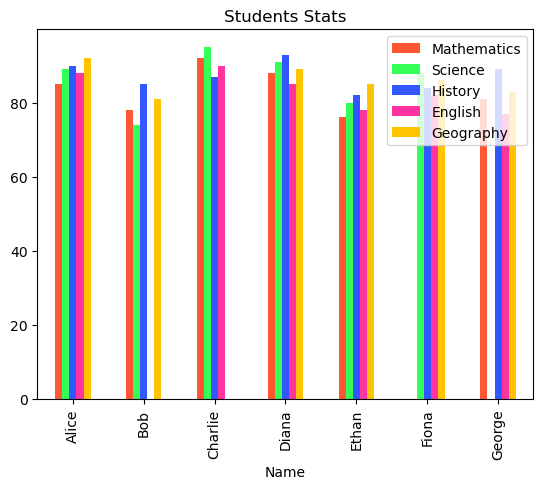

In [93]:
colors=['#FF5733', '#33FF57', '#3357FF', '#FF33A1', '#FFC300']
df.plot(x='Name',y=['Mathematics', 'Science', 'History', 'English', 'Geography'],color=colors,kind='bar',title='Students Stats')